# ***Input Output***

# Standard Input & Ouput

- 표준 출력(stdout)
 - 따로 Redirection 없으면 콘솔 출력

- 표준 입력(stdin)
 - 따로 Redirection 없으면 콘솔 입력

In [1]:
print('This', 'Sentence')
print('This', 'Sentence', sep=", ")

var = input()
print(var)

This Sentence
This, Sentence
입력을 받습니다
입력을 받습니다


# File Open

- ***파이썬은 File Descriptor를 열기 위하여 open 내장 함수 사용***

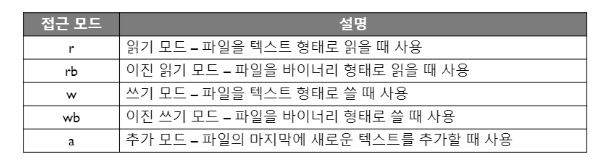

In [ ]:
fd = open("<파일이름>", "<접근모드>", encoding = "utf8")    # 파일 열기, Unix 인코딩 기본 인자는 utf8
fd.close()                                                  # 파일 닫기

- Read 메소드로 파일 일기 가능

In [ ]:
fd = open('Text.txt, "r')
contents = fd.read()                      # 파일 전체 읽기
fd.close()

print(contents)

- File descrptor 닫는 것을 깜빡할 때가 많음
 - Context Manager 형태로 사용 -> 자동으로 닫아줌
 - with <ContextManager> as <ReturnValue> 구문

In [ ]:
with open("text.txt", "r") as fd :                      # Context Manager
    contents = fd.read()                                # 파일 전체 읽기
print(contents)

- 줄 단위로 잘라서 일기, \n 가 사라진 건 아니다

In [ ]:
contents = []

with open("Text.txt", "r") as f:
    for sentence in f :
        contents.append(sentence)
print(contents)

- 전체 읽어 줄단위로 잘라서 반환 -> readlines
 - string List가 반환

In [ ]:
with open("Text.txt", "r") as f:
    contents = f.readlines()
print(contents)

 - Write 메소드로 파일 쓰기 가능

In [ ]:
with open("Text.txt", "w") as fd:
    for i in range(10) :
        fd.write(f"{i+1}번 째 문장 \n")

- Writelines 메소드로 여러 줄 작성
 - 줄 바꿈 문자 \n 을 넣어주진 않음

In [ ]:
with open("Text.txt", "w") as fd:
    fd.writelines(f"{i+1}번 째 줄입니다\n" for i in range(10))

- 추가하기 모드 ("a")로 파일 뒤에 덧 붙이기 가능

In [ ]:
i = 10
with open("Text.txt", "a") as fd:
    fd.write("내용을 추가합니다\n")
    fd.writelines(f"{i+1}번 째 줄입니다\n" for i in range(i, i+10))

# Directory

- os 라이브러리로 플랫폼 독립적인 폴더 생성 가능
 - 파이썬에선 Windows, Unix 모두 "/"로 폴더를 나타냄
- path 라이브러리로 경로 관련 연산 가능

In [2]:
import os

os.mkdir("test")                            # 폴더 하나 만들기, 이미 있으면 에러 발생

if not os.path.isdir("test") :              # 폴더가 있는지 확인
    os.mkdir("test")                        # 폴더가 아니거나, 없으면 False
# 하위 폴더 한번에 만들기, exist_ok 옵션으로 이미 있으면 무시할지 확인
os.makedirs("test/a/b/c", exist_ok=True)

- listdir 함수로 폴더내 파일/하위 폴더 검색

In [3]:
import os

print(*[entry for entry in os.listdir('test')])

a


- glob 라이브러리로 유닉스 스타일 경로명 패턴 확장 적용

In [6]:
import glob

print(*[entry for entry in glob.glob('test/*.txt')])

# Pickle

- 파이썬 객체를 그대로 저장하고 싶다면 -> Pickle
 - 객체를 직렬화(serialize)항 파일로 저장

 - 장점 :
    - 쓰기 쉽다
    - 파이썬 개체를 그대로 저장
 - 단점 :
    - 파이썬에서만 읽을 수 있다
    - 보안 문제가 있다 (신뢰할 수 있는 개체만 불러올 것!)

- Class Pickling

 - class객체를 직렬하기 위해선 해당 클래스가 직렬화 가능 필요
    - 모든 속성(attribute)가 직렬화 가능 필요
 - 저장된 객체 pickle을 로드하고 싶다면 미리 해당 클래스 선언 필요
    - 해당 클래스 정보가 없다면 역직렬화 불가능

# CSV (Comma Separate Values)

- 표 데이터를 프로그램에 상관없이 쓰기 위한 데이터 형식
 - 필드를 쉼표(,)로 구분한 텍스트 파일
 - 탭(TSV), 공백(SSV) 등으로 구분하기도 함
 - 통칭하여 Character Separated Values(CSV)라 지칭
- Readlines로 읽을 수 있음 <- 구현이 귀찮음

- csv 라이브러리로 쉽게 csv 읽기 쓰기 가능

In [2]:
import csv

with open('test.csv','r') as fd :                            
    reader = csv.reader(fd,                                                        # File Descriptor 필수
                        delimiter='.',                                             # 구분자, 기본:
                        quotechar='"',                                             # 텍스트 감싸기 문자, 기본:"
                        quoting = csv.QUOTE_MINIMAL)                                 # Parsing 방식, 기본 : 최소 길이
    for entry in reader :                                                            # 한 줄 씩 순환
        print(entry)                                                                 # Row를 List형태로 출력

FileNotFoundError: ignored

- csv 라이브러리로 쉽게 csv 읽기 쓰기 가능

In [ ]:
import csv

with open('test.csv','r') as fd :                            
    reader = csv.reader(fd,                                                          # File Descriptor 필수
                        delimiter='.',                                               # 구분자, 기본:
                        quotechar='"',                                               # 텍스트 감싸기 문자, 기본:"
                        quoting = csv.QUOTE_MINIMAL)                                 # Parsing 방식, 기본 : 최소 길이
    writer.writerow(['id','label'])                                                  # 한줄 쓰기
    writer.writerows([i,f'label_{i}'] for i in range(10))                            # 여러 줄 쓰기

# ***JSON***
- JavaScript Object Notation

- 웹 언어인 Javascript의 데이터 객체 표현 방식
 - 자료 구조 양식을 문자열로 표현
 - 간결하게 표현되어 사람과 컴퓨터 모두 읽기 편한
 - 코드에서 불러오기 쉽고 파일 크기 역시 작은 편
 - 최근 각광 받는 자료구조 형식

- ***그럼에도 Parser 직접 작성은 매우 귀찮음***

- json 라이브러리로 읽기 쓰기 가능
 - 직렬화 가능 개체
    - 원식 타임
    - str
    - int
    - float
    - bool
    - None
 - 자료구조
    - list
    - Dict
 -이 외에는 Decoder 작성 필요

#***XML***
- eXtensible Markup Language

- 데이터 구조와 의미를 설명하는 태그를 활용한 언어
 - <태그>와 <\태그> 사이에 값이 표시
 - 문자열으로 처리
 - <태그 속상= 값> 형태로 태그에 속성 부여
 - HTML은 웹 페이지 표시를 위한 XML
 - 정규표현식으로 parsing 가능

- HTML 파일을 읽어 웹 크롤러 제작 가능

#***Beautiful Soup***

- 파이썬 기본 XML Parser는 다소 불편
 - 일반적으로 XML, HTML 파싱을 위해 외부 라이브러리 사용
 - beautiful soup, xmltodict,..

- Beautiful Soup 
 - 가장 많이 쓰이는 parser 중 하나
 - HTML, HTML등 Markup 언어 Scraping을 위한 도구
 - 속도는 다소 느리나 간편하게 사용

#***Beautiful Soup로 XML 읽어 보기***

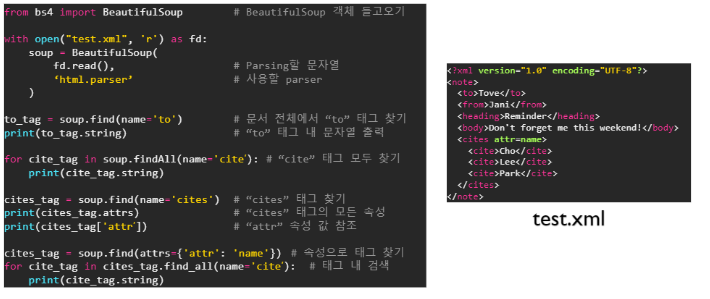

In [ ]:
from bs4 import BeautifulSoup                                     # BeautifulSoup 객체 들고 오기

with open("test.xml","r") as fd:
    soup = BeautifulSoup(
        fd.read(),                                                # Parsing할 문자열
        'html.parser'                                             # 사용할 parser
    )

to_tag = soup.find(name='to')                                     # 문서 전체에서 "to" 태그 찾기
print(to_tag.string)                                              # "to" 태그 내 문자열 출력

for cite_tag in soup.findAll(name='cite'):                         # "cite" 태그 모두 찾기
    print(cite_tag.string)                                           

cites_tag = soup.find(name='cites')                               # "cites" 태그 찾기
print(cites_tag.attrs)                                            # "cites" 태그의 모든 속성
print(cites_tag['attr'])                                          # "attr" 속성 값 참조

cites_tag = soup.find(attrs = {'attr':'name'})                    # 속성으로 태그 찾기
for cite_tag in cites_tag.find_all(name='cite'):                  # 태그 내 검색
    print(cit_tag.string)

#***YAML***
- Yaml Ain't Markup Language

- E-mail 양식에서 개념을 얻은 데이터 직렬화 양식
 - [YAML은 마크업 언어가 아디라]라는 재귀적 이름
 - 들여쓰기로 구조체를 구분
 - [Key: Value] 형식의 해시 및 [ -item]형식의 리스트 사용
 - 공백 없는 텍스트는 따옴표 없이 사용 가능
 - .yaml 혹은 .yml 확장자

- Pyhton에서는 pyyaml 라이브러리를 사용